In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/2조/regression/final_merged_캐릭터.xlsx')

In [ ]:
df

,character_name,props_used,magic_type,like_score,hate_score,sentiment_score,generation,rank,description_length,eye_saturation,eye_brightness,hair_saturation,hair_brightness,clothing_style,view_count,view_percentage,frame_count
0,키키핑,손,emotion,3,5,0,1,일반,28,61.60,49.02,58.571429,82.352941,해당없음,313161,1.456520,17407
1,다조핑,손,both,5,5,0,1,일반,29,52.58,76.08,83.743842,79.607843,해당없음,169558,0.788619,3419
2,아잉핑,손,emotion,5,5,0,1,일반,12,74.53,63.14,66.666667,83.529412,해당없음,240827,1.120092,11311
3,차나핑,손,both,3,4,0,1,일반,35,77.68,43.92,77.868852,47.843137,해당없음,209327,0.973585,4293
4,부끄핑,손,emotion,4,-3,0,1,일반,29,56.06,51.76,51.973684,59.607843,해당없음,345609,1.607436,7042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,주네핑,손,physics,2,-1,0,2,일반,37,56.50,69.41,89.447236,78.039216,해당없음,328810,0.697955,7245
97,짝짝핑,손,physics,0,1,0,2,일반,63,74.74,74.51,58.666667,58.823529,해당없음,389631,0.827058,4381
98,쪼꼼핑,손,physics,5,-1,0,2,일반,47,40.88,53.73,87.969925,52.156863,해당없음,293079,0.622110,4895
99,토닥핑,손,emotion,5,5,0,2,일반,28,56.15,73.33,43.062201,81.960784,해당없음,336290,0.713832,5481


In [ ]:
df.isnull().sum()

,0
character_name,0
props_used,0
magic_type,0
like_score,0
hate_score,0
sentiment_score,0
generation,0
rank,0
description_length,0
eye_saturation,0


In [ ]:
df.drop(['view_count'], axis = 1, inplace = True)

In [ ]:
df = pd.get_dummies(df, columns = ['props_used', 'magic_type','generation','rank','clothing_style'], drop_first=True) # 두 변수 간 correaltion =1이 되는 것을 방지

In [ ]:
df

,character_name,like_score,hate_score,sentiment_score,description_length,eye_saturation,eye_brightness,hair_saturation,hair_brightness,view_percentage,...,generation_2,generation_3,generation_4,rank_로열,rank_빌런,rank_일반,clothing_style_사회적계층성,clothing_style_시대성,clothing_style_장식성,clothing_style_해당없음
0,키키핑,3,5,0,28,61.60,49.02,58.571429,82.352941,1.456520,...,False,False,False,False,False,True,False,False,False,True
1,다조핑,5,5,0,29,52.58,76.08,83.743842,79.607843,0.788619,...,False,False,False,False,False,True,False,False,False,True
2,아잉핑,5,5,0,12,74.53,63.14,66.666667,83.529412,1.120092,...,False,False,False,False,False,True,False,False,False,True
3,차나핑,3,4,0,35,77.68,43.92,77.868852,47.843137,0.973585,...,False,False,False,False,False,True,False,False,False,True
4,부끄핑,4,-3,0,29,56.06,51.76,51.973684,59.607843,1.607436,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,주네핑,2,-1,0,37,56.50,69.41,89.447236,78.039216,0.697955,...,True,False,False,False,False,True,False,False,False,True
97,짝짝핑,0,1,0,63,74.74,74.51,58.666667,58.823529,0.827058,...,True,False,False,False,False,True,False,False,False,True
98,쪼꼼핑,5,-1,0,47,40.88,53.73,87.969925,52.156863,0.622110,...,True,False,False,False,False,True,False,False,False,True
99,토닥핑,5,5,0,28,56.15,73.33,43.062201,81.960784,0.713832,...,True,False,False,False,False,True,False,False,False,True


In [ ]:
df.columns

Index(['character_name', 'like_score', 'hate_score', 'sentiment_score',
       'description_length', 'eye_saturation', 'eye_brightness',
       'hair_saturation', 'hair_brightness', 'view_percentage', 'frame_count',
       'props_used_손', 'props_used_얼굴', 'props_used_탑승', 'magic_type_emotion',
       'magic_type_physics', 'generation_2', 'generation_3', 'generation_4',
       'rank_로열', 'rank_빌런', 'rank_일반', 'clothing_style_사회적계층성',
       'clothing_style_시대성', 'clothing_style_장식성', 'clothing_style_해당없음'],
      dtype='object')

In [ ]:
# True/False인 모든 컬럼을 찾아서 변환
bool_columns = ['props_used_손', 'props_used_얼굴', 'props_used_탑승', 'magic_type_emotion',
       'magic_type_physics', 'generation_2', 'generation_3', 'generation_4',
       'rank_로열', 'rank_빌런', 'rank_일반', 'clothing_style_사회적계층성',
       'clothing_style_시대성', 'clothing_style_장식성', 'clothing_style_해당없음']
df[bool_columns] = df[bool_columns].astype(int)


In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
train_features = df[[ 'like_score', 'hate_score', 'sentiment_score',
       'description_length', 'eye_saturation', 'eye_brightness',
       'hair_saturation', 'hair_brightness', 'frame_count',
       'props_used_손', 'props_used_얼굴', 'props_used_탑승', 'magic_type_emotion',
       'magic_type_physics', 'generation_2', 'generation_3', 'generation_4',
       'rank_로열', 'rank_빌런', 'rank_일반', 'clothing_style_사회적계층성',
       'clothing_style_시대성', 'clothing_style_장식성', 'clothing_style_해당없음']]
train_target = df['view_percentage']

In [ ]:
train_features

,like_score,hate_score,sentiment_score,description_length,eye_saturation,eye_brightness,hair_saturation,hair_brightness,frame_count,props_used_손,...,generation_2,generation_3,generation_4,rank_로열,rank_빌런,rank_일반,clothing_style_사회적계층성,clothing_style_시대성,clothing_style_장식성,clothing_style_해당없음
0,3,5,0,28,61.60,49.02,58.571429,82.352941,17407,1,...,0,0,0,0,0,1,0,0,0,1
1,5,5,0,29,52.58,76.08,83.743842,79.607843,3419,1,...,0,0,0,0,0,1,0,0,0,1
2,5,5,0,12,74.53,63.14,66.666667,83.529412,11311,1,...,0,0,0,0,0,1,0,0,0,1
3,3,4,0,35,77.68,43.92,77.868852,47.843137,4293,1,...,0,0,0,0,0,1,0,0,0,1
4,4,-3,0,29,56.06,51.76,51.973684,59.607843,7042,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2,-1,0,37,56.50,69.41,89.447236,78.039216,7245,1,...,1,0,0,0,0,1,0,0,0,1
97,0,1,0,63,74.74,74.51,58.666667,58.823529,4381,1,...,1,0,0,0,0,1,0,0,0,1
98,5,-1,0,47,40.88,53.73,87.969925,52.156863,4895,1,...,1,0,0,0,0,1,0,0,0,1
99,5,5,0,28,56.15,73.33,43.062201,81.960784,5481,1,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
train_target

,view_percentage
0,1.456520
1,0.788619
2,1.120092
3,0.973585
4,1.607436
...,...
96,0.697955
97,0.827058
98,0.622110
99,0.713832


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산 함수
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# 예시: X는 독립 변수 데이터프레임
vif = calculate_vif(train_features)
print(vif)


                 features        VIF
0              like_score   2.563909
1              hate_score   3.232300
2         sentiment_score   1.653817
3      description_length   9.668462
4          eye_saturation  27.516026
5          eye_brightness  54.840872
6         hair_saturation   9.614191
7         hair_brightness  71.687887
8             frame_count   8.608589
9            props_used_손  42.868741
10          props_used_얼굴   2.846393
11          props_used_탑승   4.256249
12     magic_type_emotion   4.578391
13     magic_type_physics   7.050306
14           generation_2   2.462421
15           generation_3  17.318360
16           generation_4  17.317023
17                rank_로열  13.860379
18                rank_빌런   3.206209
19                rank_일반  37.027903
20  clothing_style_사회적계층성  12.508150
21     clothing_style_시대성   1.880396
22     clothing_style_장식성   8.909979
23    clothing_style_해당없음  58.981244


In [ ]:
from sklearn.model_selection import train_test_split

# X는 입력 변수(features), y는 타겟 변수(target)입니다.
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.2, random_state=42)



In [ ]:

scaler = RobustScaler()

# 훈련 데이터 정규화 (fit_transform은 학습과 변환을 동시에 수행)
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 정규화 (transform만 수행)
X_test_scaled = scaler.transform(X_test)

# 결과 확인
print(X_train_scaled[:5])  # 첫 5개 행 출력
print(X_test_scaled[:5])  # 첫 5개 행 출력

[[ 0.2        -0.25        0.          1.82857143 -0.41943734 -1.32888204
   0.09336668 -2.85057471 -0.2961122   0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.4         0.25        1.          0.4         0.26280977 -0.44273241
   0.28781168  0.09195402 -0.38014084  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.25        0.         -0.17142857  0.48716818  0.36260914
  -0.63567034  0.27586207 -0.37706373  0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.         -1.        ]
 [ 0.2         0.25        0.         -0.05714286 -0.21518652  0.20167779
  -0.52045074 -2.66666667  8.7740103   0.          0.          0.
   0.         -1.

In [ ]:
y_train.min()

0.4989260844030539

In [ ]:
y_train.max()

3.878666739153757

In [ ]:
df_temp = pd.DataFrame(X_train_scaled)

In [ ]:
df_temp.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,80.000000,80.000000,80.000000,80.000000,8.000000e+01,8.000000e+01,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,-0.172500,-0.296875,0.250000,0.385000,-6.305230e-02,-2.502226e-01,-0.206069,-0.605747,1.824478,-0.125000,...,0.175000,0.175000,0.212500,0.137500,0.05000,-0.225000,0.225000,0.012500,0.125000,-0.400000
std,0.606917,0.652519,0.771321,1.137519,5.864412e-01,7.003401e-01,0.691467,1.294999,5.125793,0.332805,...,0.382364,0.382364,0.411658,0.346547,0.21932,0.420217,0.420217,0.111803,0.332805,0.492989
min,-1.600000,-2.250000,-2.000000,-1.314286,-1.323926e+00,-1.785653e+00,-1.921102,-5.563218,-1.102077,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,-1.000000,0.000000,0.000000,0.000000,-1.000000
25%,-0.600000,-0.750000,0.000000,-0.300000,-5.490784e-01,-7.247047e-01,-0.634770,-0.804598,-0.498432,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,-2.515349e-16,4.857226e-16,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.400000,0.250000,0.000000,0.700000,4.509216e-01,2.752953e-01,0.365230,0.195402,0.501568,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.400000,0.250000,2.000000,4.342857,8.618044e-01,7.118644e-01,0.637294,0.413793,21.099000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# XGBoost DMatrix는 메모리 최적화 및 빠른 연산을 위해 데이터를 변환하는데 사용됨
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 기본적인 XGBoost 파라미터 세팅
params = {
    'objective': 'reg:squarederror',  # 회귀 문제를 위한 목적 함수
    'learning_rate': 0.1,  # 학습 속도
    'max_depth': 6,  # 트리의 최대 깊이
    'alpha': 10,  # L1 정규화(회귀 계수의 절대값 규제)
    'n_estimators': 100  # 부스팅 반복 횟수
}

# XGBoost 모델 학습
model = xgb.train(params, dtrain, num_boost_round=100)

# 예측
y_pred = model.predict(dtest)

# 성능 평가 (RMSE - Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


RMSE: 0.418232306852393


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:03:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# 예측값
y_pred = model.predict(dtest)

# 다양한 성능 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"Explained Variance Score: {evs}")


MSE: 0.1749182624950742
RMSE: 0.418232306852393
MAE: 0.3456754228573866
R^2: -0.00385061387197716
Explained Variance Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# 목적 함수 정의
def xgb_objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e5),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300)
    }

    model = XGBRegressor(**params)

    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    return scores.mean()

# Optuna 스터디 생성
study = optuna.create_study(direction='maximize')  # MSE를 최소화
study.optimize(xgb_objective, n_trials=1000)

# 최적의 하이퍼파라미터 및 성능 출력
print('Best hyperparameters:', study.best_params)
print('Best score (MSE):', study.best_value)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
<ipython-input-30-4898e2545c7d>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
<ipython-input-30-4898e2545c7d>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e5),
[I 2024-10-10 01:09:05,149] Trial 0 finished with value: -0.27448209417030595 and parameters: {'learning_rate': 0.032583757858766244, 'max_depth': 6, 'alpha': 516.0983407702378, 'n_estimators': 161}. Best is trial 0 with value: -0.27448209417030595.
<ipython-input-30-4898e2545c7d>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

Best hyperparameters: {'learning_rate': 0.004858450261623278, 'max_depth': 8, 'alpha': 0.11689929013974469, 'n_estimators': 281}
Best score (MSE): -0.24586318365347068


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

<Figure size 1000x800 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

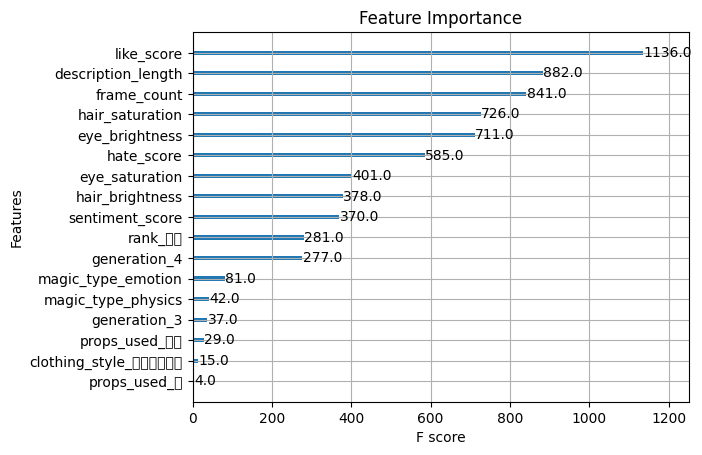

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 12.0 MB/s eta 0:00:00


In [ ]:
!apt-get install fonts-nanum -y
!fc-cache -fv


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,447 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # NanumGothic.ttf의 경로
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# 한글이 깨지지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

# SHAP explainer 생성
explainer = shap.Explainer(model)
shap_values = explainer(X_train)



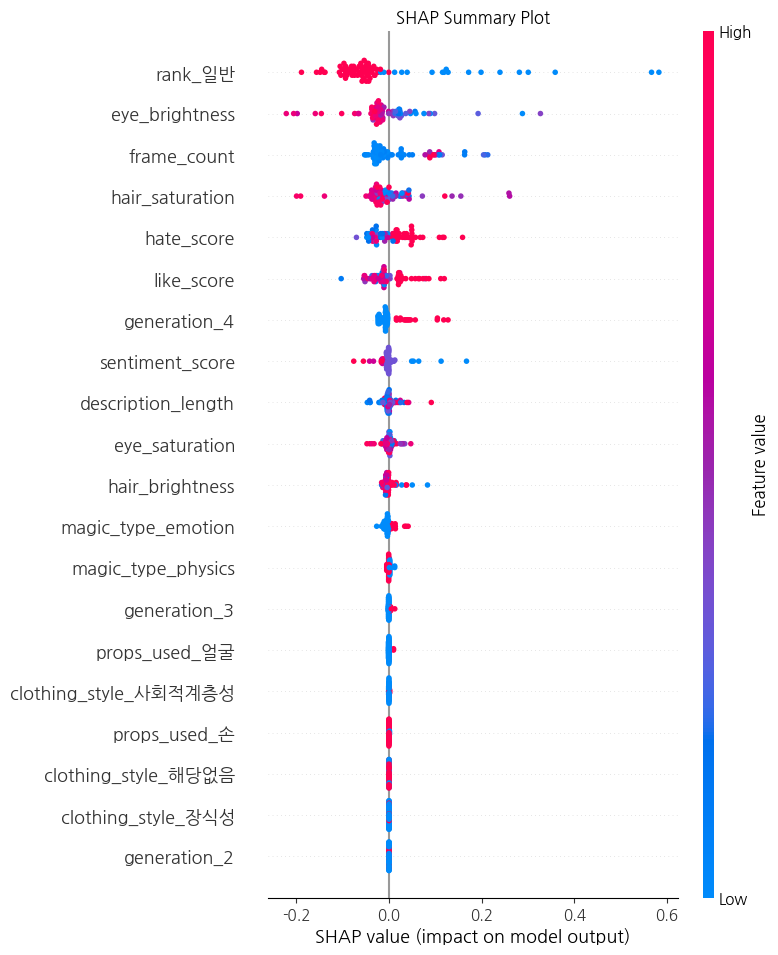

In [ ]:
import shap
import matplotlib.pyplot as plt

# 1. SHAP summary plot (처음 첨부한 그래프와 유사한 형태의 plot)
shap.summary_plot(shap_values, X_train, plot_type="dot", show=False)
plt.title("SHAP Summary Plot")
plt.show()


In [ ]:
# 1. 각 feature의 SHAP 값의 절대값을 이용한 피처 중요도 계산
shap_importance = pd.DataFrame({
    'feature': X_train.columns,
    'shap_importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='shap_importance', ascending=False)

print("Feature Importance:")
print(shap_importance)

# 2. 피처별 SHAP 값의 평균을 기준으로 영향 방향성 확인 (긍정/부정)
shap_direction = pd.DataFrame({
    'feature': X_train.columns,
    'mean_shap_value': shap_values.values.mean(axis=0)
}).sort_values(by='mean_shap_value', ascending=False)

print("\nFeature Directionality (Positive/Negative Influence):")
print(shap_direction)


Feature Importance:
                  feature  shap_importance
19                rank_일반         0.097370
5          eye_brightness         0.048909
8             frame_count         0.046684
6         hair_saturation         0.038490
1              hate_score         0.033361
0              like_score         0.029898
16           generation_4         0.020474
2         sentiment_score         0.012508
3      description_length         0.009958
4          eye_saturation         0.008597
7         hair_brightness         0.008171
12     magic_type_emotion         0.007282
13     magic_type_physics         0.001518
15           generation_3         0.001180
10          props_used_얼굴         0.000723
20  clothing_style_사회적계층성         0.000227
9            props_used_손         0.000128
11          props_used_탑승         0.000000
14           generation_2         0.000000
17                rank_로열         0.000000
18                rank_빌런         0.000000
21     clothing_style_시대성         

<ipython-input-38-2641f0693d32>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='shap_importance', y='feature', data=shap_importance, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

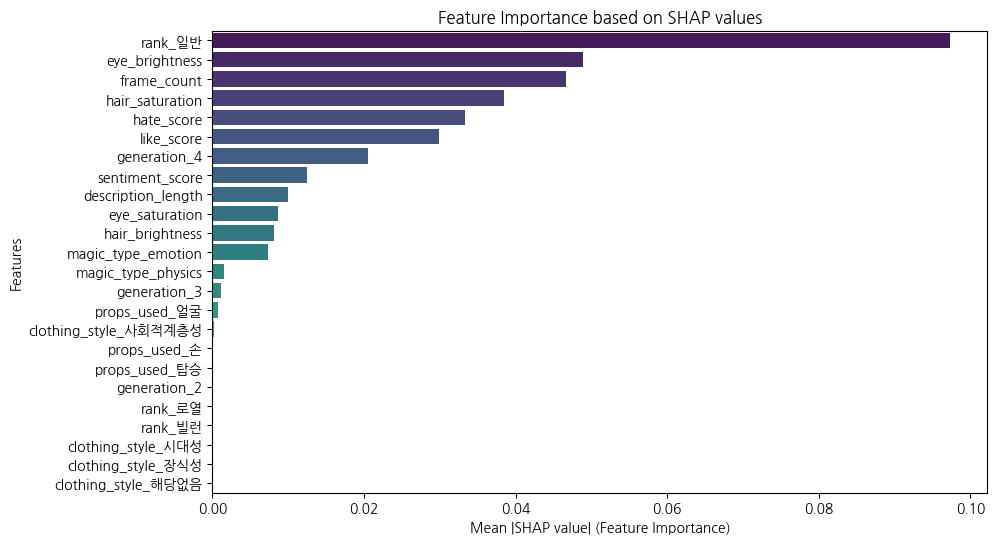

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='shap_importance', y='feature', data=shap_importance, palette='viridis')
plt.title('Feature Importance based on SHAP values')
plt.xlabel('Mean |SHAP value| (Feature Importance)')
plt.ylabel('Features')
plt.show()


<ipython-input-39-15d05ab19935>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_shap_value', y='feature', data=shap_direction, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

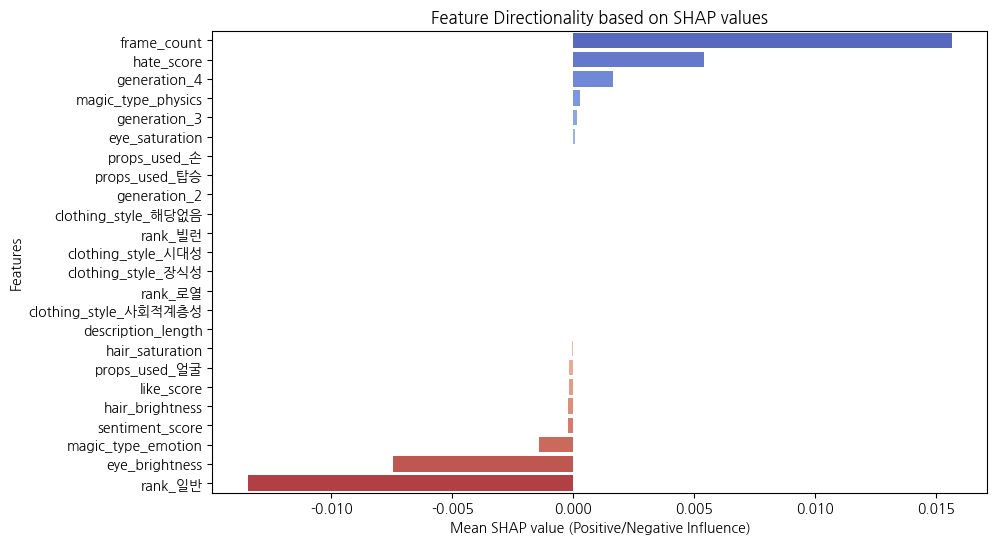

In [ ]:
# 2. 피처 방향성 시각화 (긍정/부정 영향)
plt.figure(figsize=(10, 6))
sns.barplot(x='mean_shap_value', y='feature', data=shap_direction, palette='coolwarm')
plt.title('Feature Directionality based on SHAP values')
plt.xlabel('Mean SHAP value (Positive/Negative Influence)')
plt.ylabel('Features')
plt.show()


앙상블 모델에 경우 특정 피쳐가 어떤 값일수록 y값에 어떤 영향을 주는지 구체적인 coefficient를 제공하지 못함. 여러 트리기반 모델이니까. shap을 본다고 해도 우리는 구체적인 수치를 통해 새로운 모델을 제안하고 싶은 것이므로 좀 에러가 있음. 그래서 coeffiecnt를 제공하느 전통 모델들 중 하나를 선택해 보려고하는데, 엘라스틱넷이 다중공선성 문제에 탁월하다고 하니 일단 진행해보겠음.

In [ ]:
pip install scikit-learn


In [ ]:
from sklearn.linear_model import ElasticNet

# 엘라스틱넷 모델 생성 (alpha는 정규화 강도, l1_ratio는 L1과 L2의 비율)
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 예측
y_pred = model.predict(X_test)

# 성능 지표 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.1867587538733282
R^2 Score: -0.07180283549286592


In [ ]:
coef_df = pd.DataFrame({
    'Feature': train_features.columns,
    'Coefficient': model.coef_
})

coef_df

,Feature,Coefficient
0,like_score,0.000000
1,hate_score,0.000000
2,sentiment_score,-0.000000
3,description_length,0.000000
4,eye_saturation,-0.000000
5,eye_brightness,-0.005715
6,hair_saturation,-0.001696
7,hair_brightness,-0.000049
8,frame_count,0.000003
9,props_used_손,0.000000


In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train)  # 절편 추가
ols_model = sm.OLS(y_train, X_train_sm).fit()

# p-value 출력
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        view_percentage   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     1.820
Date:                Wed, 09 Oct 2024   Prob (F-statistic):             0.0342
Time:                        16:16:44   Log-Likelihood:                -37.295
No. Observations:                  80   AIC:                             124.6
Df Residuals:                      55   BIC:                             184.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.06

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44404 (\N{HANGUL SYLLABLE GUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53457 (\N{HANGUL SYLLABLE TAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

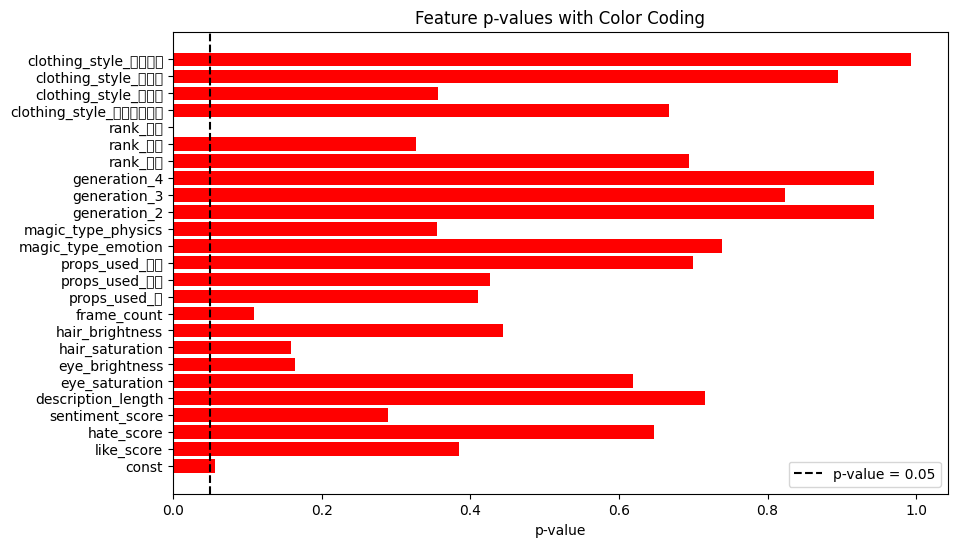

In [ ]:


# Statsmodels를 사용한 p-value 계산
X_train_sm = sm.add_constant(X_train)  # 절편 추가
ols_model = sm.OLS(y_train, X_train_sm).fit()

# p-value 및 피처 이름 추출
p_values = ols_model.pvalues
features = p_values.index

# 시각화
plt.figure(figsize=(10, 6))

# 각 피처에 대해 색상 지정
colors = ['green' if p <= 0.05 else 'red' for p in p_values]

# 바 차트 생성
plt.barh(features, p_values, color=colors)
plt.xlabel('p-value')
plt.title('Feature p-values with Color Coding')
plt.axvline(x=0.05, color='black', linestyle='--', label='p-value = 0.05')
plt.legend()
plt.show()
